# 여행경로

**문제 설명**

    주어진 항공권을 모두 이용하여 여행경로를 짜려고 합니다. 항상 "ICN" 공항에서 출발합니다.

    항공권 정보가 담긴 2차원 배열 tickets가 매개변수로 주어질 때, 방문하는 공항 경로를 배열에 담아 return 하도록 solution 함수를 작성해주세요.

**제한사항**

- 모든 공항은 알파벳 대문자 3글자로 이루어집니다.
- 주어진 공항 수는 3개 이상 10,000개 이하입니다.
- tickets의 각 행 [a, b]는 a 공항에서 b 공항으로 가는 항공권이 있다는 의미입니다.
- 주어진 항공권은 모두 사용해야 합니다.
- 만일 가능한 경로가 2개 이상일 경우 알파벳 순서가 앞서는 경로를 return 합니다.
- 모든 도시를 방문할 수 없는 경우는 주어지지 않습니다.

**입출력 예**

|tickets|	return|
|:---|:---|
|[["ICN", "JFK"], ["HND", "IAD"], ["JFK", "HND"]]|	["ICN", "JFK", "HND", "IAD"]|
|[["ICN", "SFO"], ["ICN", "ATL"], ["SFO", "ATL"] ["ATL", "ICN"], ["ATL","SFO"]]	|["ICN", "ATL", "ICN", "SFO", "ATL", "SFO"]|

**입출력 예 설명**

예제 #1

    ["ICN", "JFK", "HND", "IAD"] 순으로 방문할 수 있습니다.

예제 #2

    ["ICN", "SFO", "ATL", "ICN", "ATL", "SFO"] 순으로 방문할 수도 있지만 ["ICN", "ATL", "ICN", "SFO", "ATL", "SFO"] 가 알파벳 순으로 앞섭니다.

In [1]:
import copy

def travel(answer_set,answer,start,K,count):
    answer.append(start)
    if count==K:
        return True
    try:
        answer_set[start]
    except:
        answer.pop()
        return False
    
    for i in range(len(answer_set[start])):
        end=answer_set[start][i]
        count+=1
        temp_set=copy.deepcopy(answer_set)
        temp_set[start]=temp_set[start][:i]+temp_set[start][i+1:]
        boolean=travel(temp_set,answer,end,K,count)
        if boolean:
            return True
        else:
            count-=1
    answer.pop()
    return False

def solution(tickets):
    answer_set={}
    for ticket in tickets:
        if ticket[0] in answer_set:
            answer_set[ticket[0]].append(ticket[1])
            answer_set[ticket[0]].sort()
        else:
            answer_set[ticket[0]]=[ticket[1]]
    answer=[]
    count=0
    start="ICN"
    travel(answer_set,answer,start,len(tickets),count)
    return answer

In [2]:
# Test Case 1
tickets = [["ICN", "JFK"], ["HND", "IAD"], ["JFK", "HND"]]
assert ["ICN", "JFK", "HND", "IAD"] == solution(tickets)

In [3]:
# Test Case 2
tickets = [["ICN", "SFO"], ["ICN", "ATL"], ["SFO", "ATL"], ["ATL", "ICN"], ["ATL","SFO"]]
assert ["ICN", "ATL", "ICN", "SFO", "ATL", "SFO"] == solution(tickets)

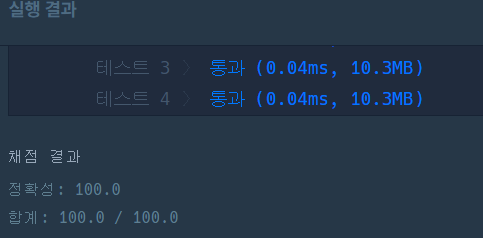